<a href="https://colab.research.google.com/github/AlexRodriguezVillavicencio/DataScience-curriculum/blob/alex/tutoria/demo_desafio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $$\text{Demo Desafio 2}$$

Fuente : https://www.kaggle.com/datasets/kriegsmaschine/polish-it-job-board-data-from-2022

`Contexto:` Se presenta un Dataset con información de la bolsa de trabajo de TI de Polonia del año 2022

`Objetivo:` Analizar los datos y encontrar información relevante.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import pandas as pd

## Importamos el Dataset

In [2]:
df = pd.read_csv('./sample_data/polish_job.csv')
print(f"filas: {df.shape[0]} , columnas: {df.shape[1]}")
df.head(3)

filas: 37787 , columnas: 35


,Title,City,Country_code,Marker_icon,Workplace_type,Experience_level,Published_at,Remote_interview,Remote,Open_to_hire_Ukrainians,...,salary_from_other,salary_to_other,salary_currency_other,currency_exchange_rate,skills_name_0,skills_value_0,skills_name_1,skills_value_1,skills_name_2,skills_value_2
0,Senior Frontend Software Engineer,London,GB,javascript,remote,senior,2022-07-31T11:00:14.548Z,True,True,True,...,0,0,unknown,0.176806,React,5,TypeScript,5,unknown,0
1,Sr. Backend Engineer,Berlin,DE,java,remote,senior,2022-07-07T10:25:00.000Z,True,True,True,...,0,0,unknown,0.179577,Kotlin,3,Backend,4,Java,4
2,Sr. Backend Engineer,Katowice,PL,java,remote,senior,2022-05-31T11:32:00.000Z,True,True,True,...,0,0,unknown,0.185871,Kotlin,3,Backend,4,Java,4


Como la salida no nos permite ver toda la columnas, usemos la función "iloc" para ir recorriendo toda la tabla y ver los datos.

Por ejemplo 
```
df.iloc[343:346,12:29]
```

## Analizamos el Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37787 entries, 0 to 37786
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      37787 non-null  object 
 1   City                       37787 non-null  object 
 2   Country_code               37754 non-null  object 
 3   Marker_icon                37787 non-null  object 
 4   Workplace_type             37787 non-null  object 
 5   Experience_level           37787 non-null  object 
 6   Published_at               37787 non-null  object 
 7   Remote_interview           37787 non-null  bool   
 8   Remote                     37787 non-null  bool   
 9   Open_to_hire_Ukrainians    32585 non-null  object 
 10  Company_size_from          37732 non-null  object 
 11  Company_size_to            37748 non-null  object 
 12  if_permanent               37787 non-null  bool   
 13  salary_from_permanent      37787 non-null  flo

Veamos un poco las variables categóricas...

In [4]:
df['salary_currency_permanent'].unique()

array(['gbp', 'unknown', 'eur', 'pln', 'usd', 'chf'], dtype=object)

Los salarios se pagan en diferentes monedas, esto puede ser un problema al querer comparar los salarios, incluso hay salarios con moneda desconocida. veamos desde que países trabajan los diferentes profesionales.

In [5]:
df['Country_code'].unique()

array(['GB', 'DE', 'PL', 'NL', 'CH', 'CZ', 'DK', 'EE', 'FI', 'ES', 'RS',
       'UA', 'FR', 'LV', 'SK', 'SI', 'SE', 'LT', 'AT', 'BE', 'MU', 'LU',
       'US', 'RO', 'IT', 'AE', 'PT', 'BG', nan, 'IL', 'AU', 'CA', 'IS',
       'MX', 'IE', 'NO', 'CN', 'CY', 'MT', 'SL', 'SG', 'HU', 'JP', 'HK',
       'CO', 'ZA', 'IN', 'TW', 'GR', 'CL', 'TR', 'BR', 'AM', 'MY', 'GI',
       'SA', 'HR', 'AR'], dtype=object)

Veamos que lenguajes de programación o habilidades son los que se solicitan en las empresas Polacas.

In [6]:
df['Marker_icon'].unique()

array(['javascript', 'java', 'python', 'mobile', 'go', 'devops', 'other',
       'erp', 'pm', 'data', 'ux', 'net', 'admin', 'testing', 'ruby',
       'game', 'support', 'html', 'php', 'architecture', 'scala',
       'analytics', 'c', 'security'], dtype=object)

In [7]:
df['skills_name_0'].unique()

array(['React', 'Kotlin', 'Flask', ..., 'WebRTC', '#SEO',
       'problem-solving skills'], dtype=object)

In [8]:
df['skills_name_1'].unique()

array(['TypeScript', 'Backend', 'English', ..., '#HTML', 'TCP / IP',
       'Camunda'], dtype=object)

Exploremos como se distribuye los empleos de acuerdo al tipo (remoto, oficina, parcialmente remoto)...

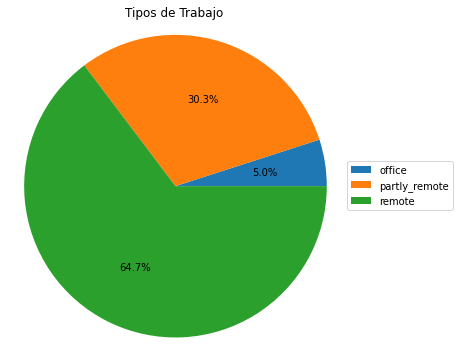

In [9]:
pie1 = df.groupby('Workplace_type').count().Title
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(pie1,autopct='%1.1f%%')
ax.legend(labels=pie1.index,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax.axis('equal')
ax.set_title("Tipos de Trabajo")
plt.show()

Vemos que el 64.7% de los profesionales en IT trabajan de manera remota y solo un 5% en oficina. Me pregunto que puestos o habilidades son los que se exportan a Polonia.



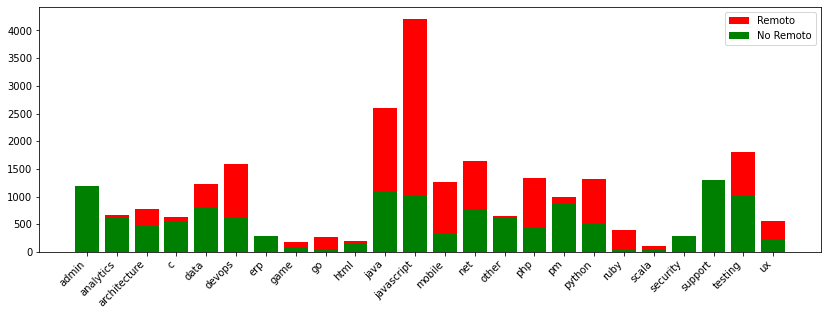

In [10]:
# creamos nuestros filtros para usarlos en nuestra representación gráfica
df_bool = df['Remote'] == True
bar1 = df[df_bool].groupby('Marker_icon').count()['Title']
bar2 = df[~df_bool].groupby('Marker_icon').count()['Title']

# Representación gráfica
fig, ax = plt.subplots(figsize=(14,5))
ax.bar(bar1.index,bar1.values,color='red',label='Remoto')
ax.bar(bar2.index,bar2.values,color='green',label='No Remoto')
fig.autofmt_xdate(rotation=45)
ax.legend()
plt.show()

Interesante! podemos ver  que los lenguajes de Java, Javascript, lenguajes para mobile, tecnologías .net, python , deovps y testing . Son los que más se solicitan de manera remota.

Es hora de analizar las variables cuantitativas.

In [14]:
df.describe()

,salary_from_permanent,salary_to_permanent,salary_from_b2b,salary_to_b2b,salary_from_mandate,salary_to_mandate,salary_from_other,salary_to_other,currency_exchange_rate,skills_value_0,skills_value_1,skills_value_2
count,37787.000000,37787.000000,37787.000000,37787.000000,37787.000000,37787.000000,37787.0,37787.0,37787.000000,37787.000000,37787.000000,37787.000000
mean,4436.723554,6361.915644,8533.135647,11878.328369,113.809577,162.435392,0.0,0.0,0.011464,3.018340,3.103581,3.098447
std,8339.678257,11318.558306,9433.971039,12631.154099,1192.990106,1700.149479,0.0,0.0,0.048520,0.942202,1.136302,1.432064
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,3.000000,3.000000,3.000000
50%,0.000000,0.000000,6500.000000,10000.000000,0.000000,0.000000,0.0,0.0,0.000000,3.000000,3.000000,3.000000
75%,8800.000000,13500.000000,16000.000000,22800.000000,0.000000,0.000000,0.0,0.0,0.000000,4.000000,4.000000,4.000000
max,413114.609646,495737.531575,113246.500000,137341.500000,39000.000000,56808.000000,0.0,0.0,0.234999,5.000000,5.000000,5.000000


Podemos apreciar que los salarios minimos son de 0.000, el 25% de los titulos tienen 0, incluso el 50% de la data cuenta con salario de 0.000, eso nos hace alertar que hay titulos sin salario especificado. Lo que deberiamos hacer es filtrar la tabla de modo que solo nos quedemos con los salarios especificados.

In [15]:
# filtramos todos los salarios mayores a cero
df_filter = df[(df['salary_from_permanent'] != 0)]
df_filter.shape

(13031, 35)

Luego de filtar la tabla, se redujo el número de filas de 37 787 a 13 031, mas de la mitad!

Recordemos también que los salarios estaban en diferente monedas, pasemos todo a USD. Y eliminemos aquellas que el pago del salario es de moneda desconocida.
 
- 1 GBP = 1.22 USD
- 1 EUR = 1.08 USD
- 1 PLN = 0.23 USD
- 1 CHF = 1.08 USD

In [17]:
df_filter = df_filter[(df_filter['salary_currency_permanent'] != 'unknown')]
df_copy = df_filter.copy()

Ahora hacemos una pequeña transformación de la columna salarios, pasando todo a USD.

In [18]:
# 1 gbp = 1.22 usd
df_copy.loc[df_copy['salary_currency_permanent'] == 'gbp', 'salary_from_permanent'] = df_copy.loc[df_copy['salary_currency_permanent'] == 'gbp','salary_from_permanent']*1.22
# 1 eur = 1.08 usd
df_copy.loc[df_copy['salary_currency_permanent'] == 'eur', 'salary_from_permanent'] = df_copy.loc[df_copy['salary_currency_permanent'] == 'eur','salary_from_permanent']*1.08
# 1 pln = 0.23 usd
df_copy.loc[df_copy['salary_currency_permanent'] == 'pln', 'salary_from_permanent'] = df_copy.loc[df_copy['salary_currency_permanent'] == 'pln','salary_from_permanent']*0.23
# 1 chf = 1.08 usd
df_copy.loc[df_copy['salary_currency_permanent'] == 'chf', 'salary_from_permanent'] = df_copy.loc[df_copy['salary_currency_permanent'] == 'chf','salary_from_permanent']*1.08



Dentro de las variables categórias, pudimos observar una columna "Experiencie_level" que divide a los profesionales en tres categorías: Junior, Mid y Senior. 
Analizemos los salarios con respecto a las tres categorías (Junior, Mid , Senior)

             junior            mid         senior
count   1782.000000    6692.000000    4557.000000
mean    1498.954658    3515.854998    6365.749189
std     1979.652491    9391.342587   13390.233123
min      332.350000     690.000000    1150.000000
25%     1035.000000    1909.000000    3116.500000
50%     1150.000000    2415.000000    3680.000000
75%     1610.000000    3220.000000    4600.000000
max    46724.688000  405259.200000  503999.823768



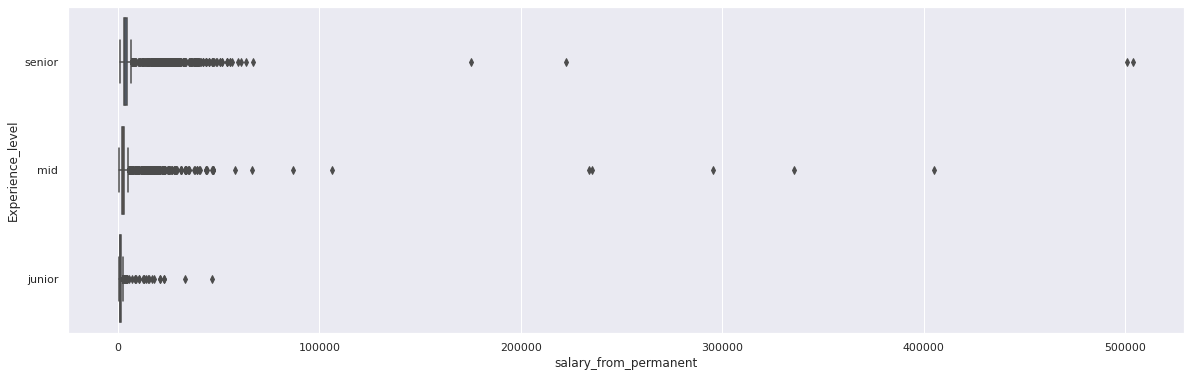

In [19]:
# dividimos el dataset en tres tipos
junior = df_copy[df_copy['Experience_level'] == "junior"]
mid = df_copy[df_copy['Experience_level'] == "mid"]
senior = df_copy[df_copy['Experience_level'] == "senior"]

# creamos un nuevo dataframe
df_new = pd.DataFrame()
df_new['junior'] = junior['salary_from_permanent'].describe()
df_new['mid'] = mid['salary_from_permanent'].describe()
df_new['senior'] = senior['salary_from_permanent'].describe()
print(df_new)
print()

# Representemos de manera gráfica
sns.set(rc={"figure.figsize":(20, 6)})
sns.boxplot(data=df_copy, x="salary_from_permanent", y="Experience_level")
plt.show()

Podemos apreciar, en la tabla, que el sueldo minimo para un Junior es de \$ 332, un mid \$ 690 y un senior \$ 1150.
Asimismo, el 50% de los puestos en IT bordean para un Junior en \$ 1150, para un mid \$ 2415 y para un senior \$ 3680.

Una hipotesis para los sueldos minimos que se presentaron es que algunos profesionales provienen de paises pobres como la india, o quizás se esté reclutando a Ukranianos con bajo sueldo, incluso debí segmentar en base a las tecnologías, y esos sueldos representen a un UX designer (por ejemplo).

Por otro lado, en la caja de bigotes, vemos casos excepcionales (outliers) de profesionales senior que superan lo \$ 500 000! y casos mid que superar los \$ 300 000!

Sin embargo, no podemos apreciar bien la caja de bigotes, y nos hace pensar a simple vista que la mayoria gana similiar independiente si sea junior, mid o level. Limitemos la gráfica para visualizar mejor...

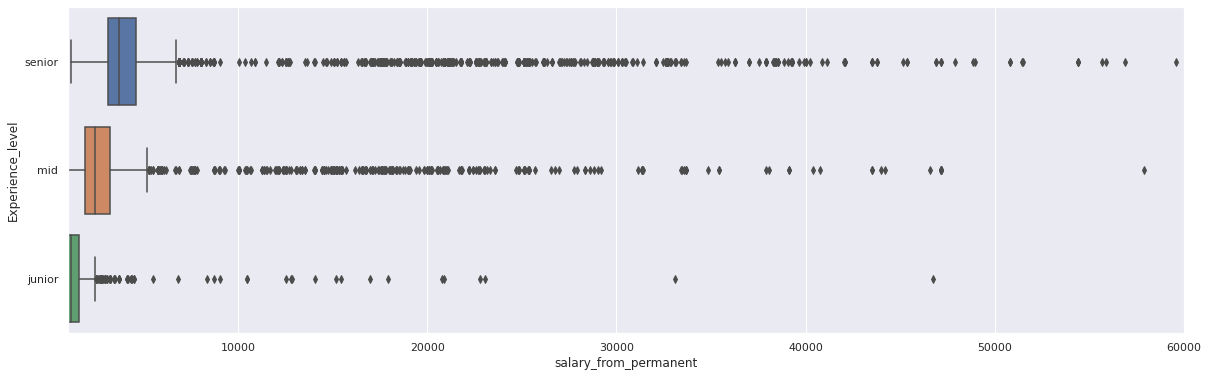

In [20]:
# Representemos de manera gráfica
sns.set(rc={"figure.figsize":(20, 6)})
sns.boxplot(data=df_copy, x="salary_from_permanent", y="Experience_level")
plt.xlim(1000,60000)
plt.show()

Bueno, ahora podemos ver la direfencia entre estos tres niveles.

Me surge la curiosidad saber de donde provienen los salarios más altos, primero por país y después por tecnologías o profesión.

In [25]:
paises = df['Country_code'].unique()
print(f'paises: {len(paises)}')

paises: 58


Pero como podemos ver, hay 58 países, lo que no es aconsejable hacer un gráfico de torta.

vea: https://www.ine.es/explica/docs/pasos_tipos_graficos.pdf

Intentemos con un grafico de barras, y pongamos como limite \$ 35 000.

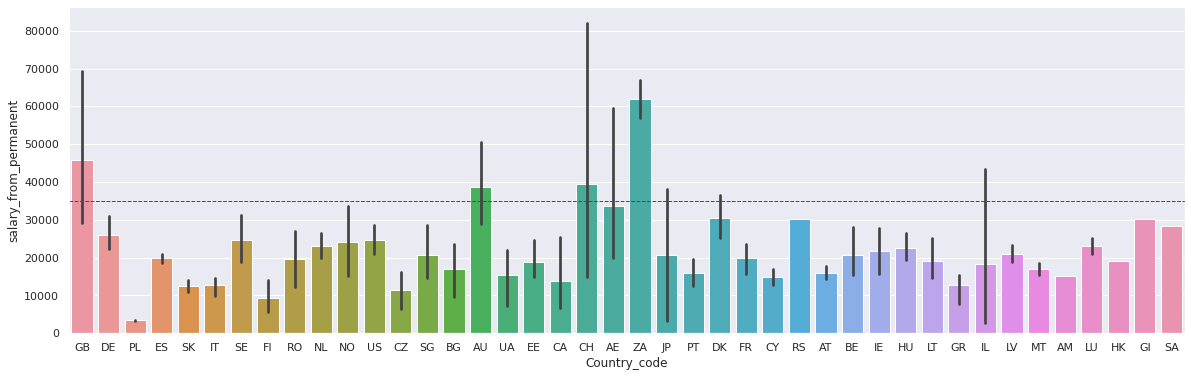

In [45]:
sns.barplot(x=df_copy['Country_code'], y=df_copy['salary_from_permanent'])
# coloquemos a criterio propio un  limite
plt.axhline(35000, color = "red", linewidth = 1, linestyle = "dashed");
plt.show()

Asombroso!... Los profesionales con sueldos medios más altos provienen de GB (Reino Unido), AU (Australia), CH (Suiza), ZA (Sudádrica). Y existen casos excepcionales (outliers) en paises como AE (Emiratos Árabes Unidos), JP (Japón), DK (Dinamarca) y IL (Israel).

Nota: Las barras de error (lineas negras), representan la variabilidad de los datos.
vea: https://es.wikipedia.org/wiki/Barra_de_error

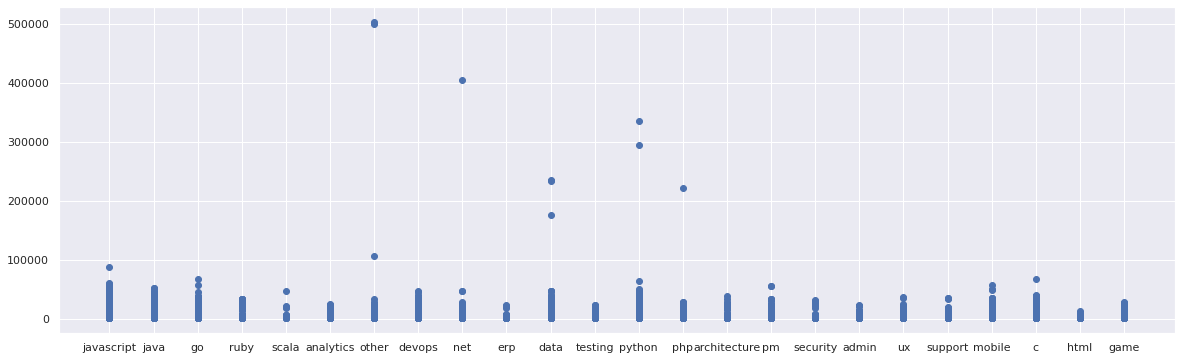

In [46]:
plt.scatter(x=df_copy['Marker_icon'], y=df_copy['salary_from_permanent'])
plt.show()

De igual manera, hacemos un scatter para visualizar ya no la media, si no en si los casos de sueldos excepcionales. 
Donde vemos que Python, professionales en Data, PHP, teconologias .NET son los lenguajes que usan los de mayor sueldo.
Incluso vemos una opción (otros) que es uno de los más altos, veamos de que titulo se trata.


In [28]:
df_copy['salary_from_permanent'].max()

503999.8237678435

Capturamos el valor máximo y luego lo localizamos como filtro en la tabla.

In [31]:
df_copy[df_copy['salary_from_permanent'] == 503999.8237678435]

,Title,City,Country_code,Marker_icon,Workplace_type,Experience_level,Published_at,Remote_interview,Remote,Open_to_hire_Ukrainians,...,salary_from_other,salary_to_other,salary_currency_other,currency_exchange_rate,skills_name_0,skills_value_0,skills_name_1,skills_value_1,skills_name_2,skills_value_2
29545,Development Manager,Gdańsk,PL,other,remote,senior,2022-05-13T12:21:00.000Z,False,True,False,...,0,0,unknown,0.181548,Python,4,TypeScript,4,Ruby,4


Asi podemos ver que el profesional de mayor sueldo es un "Development Manager", proveniente del país de Polonia y que trabaja de manera remota. Algo por añadir es que su entrevista no fué remota. Y que los lenguajes que usa son Python, TypeScript y Ruby.

### Buscando una correlación de los 4 sueldos que existen en la tabla ...

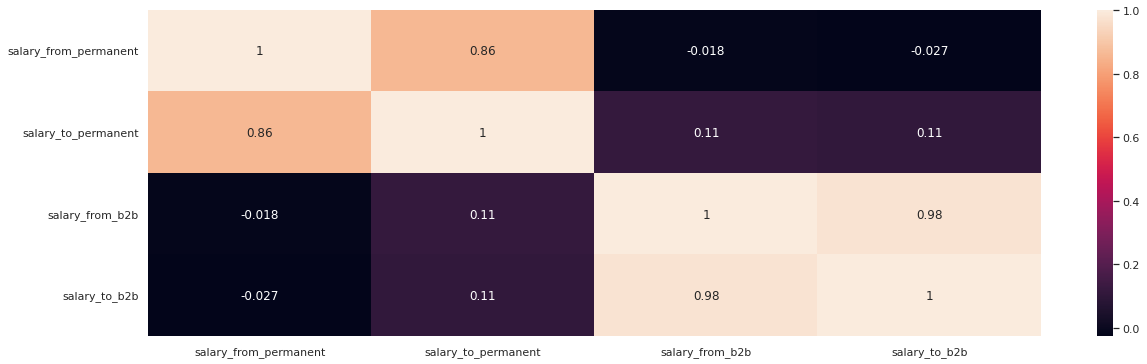

,salary_from_permanent,salary_to_permanent,salary_from_b2b,salary_to_b2b
0,40255.854624,47136.387097,32996.602151,47136.387097
1,39634.783463,46409.162426,32487.527429,46409.162426
2,38292.674411,44837.660034,31387.438042,44837.660034
3,38560.144299,45150.845888,31606.675655,45150.845888


In [69]:
# buscamos una correlación entre los diferentes tipos de sueldos
correlacion = df_copy.loc[:,['salary_from_permanent', 'salary_to_permanent',
        'salary_from_b2b','salary_to_b2b']].corr()
sns.heatmap(correlacion, annot=True)
plt.show()

print()
df_copy.loc[:,['salary_from_permanent', 'salary_to_permanent',
        'salary_from_b2b','salary_to_b2b']].head(4)

Escogimos como sueldo la columna "salary_from_permanent", pero dentro de la tabla hubo 3 más, al hacer este mapa de calor vemos que existe una relación lineal entre "salary_from_permanent" y "salary_to_permanent", de igual manera para los otros dos.
Pero no, existe alguna relación entre "salary_from_permanent" y "salary_from_b2b" por ejemplo. Ya mostrando la tabla con algunos datos, podemos observar que estas dos columnas contienen la misma información.

Si queremos ver estas relaciones entre las magnitudes de forma gráfica podemos usar la función pairplot...

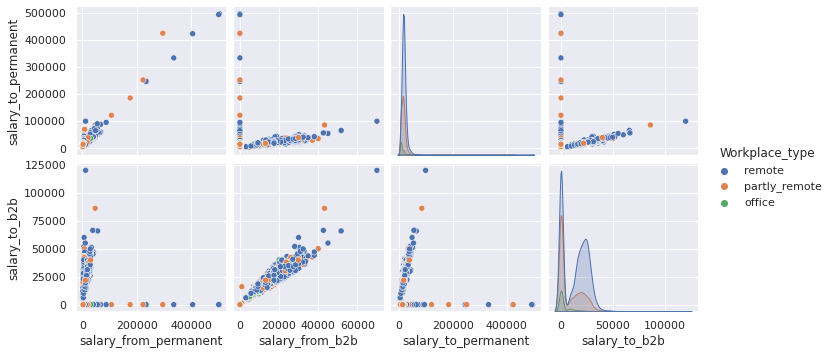

In [70]:
sns.pairplot(
    df_copy,
    x_vars=["salary_from_permanent", "salary_from_b2b","salary_to_permanent","salary_to_b2b"],
    y_vars=["salary_to_permanent", "salary_to_b2b"],
    hue="Workplace_type" # aqui divido por el tipo de trabajos, pero no seria necesario
)
plt.show()

## Conclusión

Para nuestro caso no afectó que usáramos cualquiera de las columnas que mostraban los sueldos. Claro, a menos que necesitáramos el valor del dato para hacer algún cálculo (ya que solo vimos medias y tendencias).

Entonces es bueno tener siempre el diccionario de las columnas para saber que representan cada columna. Y documentar de igual manera un diccionario y otros cientificos de datos puedan entender tu dataset.

También pudimos entender como los gráficos nos ayudan a comprender más fácil nuestra tabla y deducir nuestras interrogantes. Pero a la vez pueden sesgarnos si no lo aplicamos de una manera correcta (como lo que pasó en el grafico de bigotes al pensar que los tres niveles ganaban casi lo mismo).